<a href="https://colab.research.google.com/github/junhan-kim/Deep-Learning-Practice/blob/master/14_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [0]:
downloaded = drive.CreateFile({'id':'1jzqk76kFD-F9DWMWhpcMtD7CehjyvCH_'})
downloaded.GetContentFile('wine.csv')

In [0]:
import pandas as pd
import numpy



In [0]:
df_pre = pd.read_csv('wine.csv', header=None)
df = df_pre.sample(frac=0.15)

In [0]:
print(df.head(5))

       0     1     2      3      4      5      6        7     8     9     10  \
1173  7.6  0.36  0.31   1.70  0.079   26.0   65.0  0.99716  3.46  0.62   9.5   
4829  6.7  0.13  0.57   6.60  0.056   60.0  150.0  0.99548  2.96  0.43   9.4   
5863  5.8  0.20  0.16   1.40  0.042   44.0   99.0  0.98912  3.23  0.37  12.2   
5460  6.2  0.22  0.30  12.40  0.054  108.0  152.0  0.99728  3.10  0.47   9.5   
5095  6.0  0.24  0.28   3.95  0.038   61.0  134.0  0.99146  3.30  0.54  11.3   

      11  12  
1173   6   1  
4829   6   0  
5863   6   0  
5460   6   0  
5095   7   0  


In [0]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 1173 to 5468
Data columns (total 13 columns):
0     975 non-null float64
1     975 non-null float64
2     975 non-null float64
3     975 non-null float64
4     975 non-null float64
5     975 non-null float64
6     975 non-null float64
7     975 non-null float64
8     975 non-null float64
9     975 non-null float64
10    975 non-null float64
11    975 non-null int64
12    975 non-null int64
dtypes: float64(11), int64(2)
memory usage: 106.6 KB
None


In [0]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)
  
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1, save_best_only = True)


history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500, verbose=0, callbacks=[checkpointer])



Epoch 00001: val_loss improved from inf to 0.88890, saving model to ./model/01-0.8889.hdf5

Epoch 00002: val_loss improved from 0.88890 to 0.76751, saving model to ./model/02-0.7675.hdf5

Epoch 00003: val_loss improved from 0.76751 to 0.65314, saving model to ./model/03-0.6531.hdf5

Epoch 00004: val_loss improved from 0.65314 to 0.54670, saving model to ./model/04-0.5467.hdf5

Epoch 00005: val_loss improved from 0.54670 to 0.45093, saving model to ./model/05-0.4509.hdf5

Epoch 00006: val_loss improved from 0.45093 to 0.37322, saving model to ./model/06-0.3732.hdf5

Epoch 00007: val_loss improved from 0.37322 to 0.32490, saving model to ./model/07-0.3249.hdf5

Epoch 00008: val_loss improved from 0.32490 to 0.31524, saving model to ./model/08-0.3152.hdf5

Epoch 00009: val_loss did not improve from 0.31524

Epoch 00010: val_loss did not improve from 0.31524

Epoch 00011: val_loss did not improve from 0.31524

Epoch 00012: val_loss did not improve from 0.31524

Epoch 00013: val_loss impro


Epoch 00157: val_loss did not improve from 0.13924

Epoch 00158: val_loss did not improve from 0.13924

Epoch 00159: val_loss did not improve from 0.13924

Epoch 00160: val_loss improved from 0.13924 to 0.13897, saving model to ./model/160-0.1390.hdf5

Epoch 00161: val_loss improved from 0.13897 to 0.13739, saving model to ./model/161-0.1374.hdf5

Epoch 00162: val_loss improved from 0.13739 to 0.13703, saving model to ./model/162-0.1370.hdf5

Epoch 00163: val_loss did not improve from 0.13703

Epoch 00164: val_loss did not improve from 0.13703

Epoch 00165: val_loss did not improve from 0.13703

Epoch 00166: val_loss improved from 0.13703 to 0.13597, saving model to ./model/166-0.1360.hdf5

Epoch 00167: val_loss improved from 0.13597 to 0.13549, saving model to ./model/167-0.1355.hdf5

Epoch 00168: val_loss improved from 0.13549 to 0.13517, saving model to ./model/168-0.1352.hdf5

Epoch 00169: val_loss did not improve from 0.13517

Epoch 00170: val_loss did not improve from 0.13517

E


Epoch 00356: val_loss did not improve from 0.11335

Epoch 00357: val_loss did not improve from 0.11335

Epoch 00358: val_loss did not improve from 0.11335

Epoch 00359: val_loss did not improve from 0.11335

Epoch 00360: val_loss did not improve from 0.11335

Epoch 00361: val_loss did not improve from 0.11335

Epoch 00362: val_loss did not improve from 0.11335

Epoch 00363: val_loss did not improve from 0.11335

Epoch 00364: val_loss improved from 0.11335 to 0.11315, saving model to ./model/364-0.1132.hdf5

Epoch 00365: val_loss improved from 0.11315 to 0.11264, saving model to ./model/365-0.1126.hdf5

Epoch 00366: val_loss improved from 0.11264 to 0.11235, saving model to ./model/366-0.1123.hdf5

Epoch 00367: val_loss improved from 0.11235 to 0.11208, saving model to ./model/367-0.1121.hdf5

Epoch 00368: val_loss improved from 0.11208 to 0.11203, saving model to ./model/368-0.1120.hdf5

Epoch 00369: val_loss did not improve from 0.11203

Epoch 00370: val_loss did not improve from 0.1


Epoch 00608: val_loss improved from 0.09420 to 0.09392, saving model to ./model/608-0.0939.hdf5

Epoch 00609: val_loss did not improve from 0.09392

Epoch 00610: val_loss did not improve from 0.09392

Epoch 00611: val_loss did not improve from 0.09392

Epoch 00612: val_loss did not improve from 0.09392

Epoch 00613: val_loss did not improve from 0.09392

Epoch 00614: val_loss did not improve from 0.09392

Epoch 00615: val_loss did not improve from 0.09392

Epoch 00616: val_loss did not improve from 0.09392

Epoch 00617: val_loss did not improve from 0.09392

Epoch 00618: val_loss did not improve from 0.09392

Epoch 00619: val_loss did not improve from 0.09392

Epoch 00620: val_loss did not improve from 0.09392

Epoch 00621: val_loss did not improve from 0.09392

Epoch 00622: val_loss did not improve from 0.09392

Epoch 00623: val_loss did not improve from 0.09392

Epoch 00624: val_loss did not improve from 0.09392

Epoch 00625: val_loss did not improve from 0.09392

Epoch 00626: val_l


Epoch 00891: val_loss did not improve from 0.07936

Epoch 00892: val_loss did not improve from 0.07936

Epoch 00893: val_loss did not improve from 0.07936

Epoch 00894: val_loss did not improve from 0.07936

Epoch 00895: val_loss did not improve from 0.07936

Epoch 00896: val_loss did not improve from 0.07936

Epoch 00897: val_loss did not improve from 0.07936

Epoch 00898: val_loss did not improve from 0.07936

Epoch 00899: val_loss did not improve from 0.07936

Epoch 00900: val_loss did not improve from 0.07936

Epoch 00901: val_loss did not improve from 0.07936

Epoch 00902: val_loss did not improve from 0.07936

Epoch 00903: val_loss did not improve from 0.07936

Epoch 00904: val_loss did not improve from 0.07936

Epoch 00905: val_loss did not improve from 0.07936

Epoch 00906: val_loss did not improve from 0.07936

Epoch 00907: val_loss did not improve from 0.07936

Epoch 00908: val_loss did not improve from 0.07936

Epoch 00909: val_loss did not improve from 0.07936

Epoch 00910


Epoch 01231: val_loss did not improve from 0.07936

Epoch 01232: val_loss did not improve from 0.07936

Epoch 01233: val_loss did not improve from 0.07936

Epoch 01234: val_loss did not improve from 0.07936

Epoch 01235: val_loss did not improve from 0.07936

Epoch 01236: val_loss did not improve from 0.07936

Epoch 01237: val_loss did not improve from 0.07936

Epoch 01238: val_loss did not improve from 0.07936

Epoch 01239: val_loss did not improve from 0.07936

Epoch 01240: val_loss did not improve from 0.07936

Epoch 01241: val_loss did not improve from 0.07936

Epoch 01242: val_loss did not improve from 0.07936

Epoch 01243: val_loss did not improve from 0.07936

Epoch 01244: val_loss did not improve from 0.07936

Epoch 01245: val_loss did not improve from 0.07936

Epoch 01246: val_loss did not improve from 0.07936

Epoch 01247: val_loss did not improve from 0.07936

Epoch 01248: val_loss did not improve from 0.07936

Epoch 01249: val_loss did not improve from 0.07936

Epoch 01250


Epoch 01581: val_loss did not improve from 0.07936

Epoch 01582: val_loss did not improve from 0.07936

Epoch 01583: val_loss did not improve from 0.07936

Epoch 01584: val_loss did not improve from 0.07936

Epoch 01585: val_loss did not improve from 0.07936

Epoch 01586: val_loss did not improve from 0.07936

Epoch 01587: val_loss did not improve from 0.07936

Epoch 01588: val_loss did not improve from 0.07936

Epoch 01589: val_loss did not improve from 0.07936

Epoch 01590: val_loss did not improve from 0.07936

Epoch 01591: val_loss did not improve from 0.07936

Epoch 01592: val_loss did not improve from 0.07936

Epoch 01593: val_loss did not improve from 0.07936

Epoch 01594: val_loss did not improve from 0.07936

Epoch 01595: val_loss did not improve from 0.07936

Epoch 01596: val_loss did not improve from 0.07936

Epoch 01597: val_loss did not improve from 0.07936

Epoch 01598: val_loss did not improve from 0.07936

Epoch 01599: val_loss did not improve from 0.07936

Epoch 01600


Epoch 01907: val_loss did not improve from 0.07936

Epoch 01908: val_loss did not improve from 0.07936

Epoch 01909: val_loss did not improve from 0.07936

Epoch 01910: val_loss did not improve from 0.07936

Epoch 01911: val_loss did not improve from 0.07936

Epoch 01912: val_loss did not improve from 0.07936

Epoch 01913: val_loss did not improve from 0.07936

Epoch 01914: val_loss did not improve from 0.07936

Epoch 01915: val_loss did not improve from 0.07936

Epoch 01916: val_loss did not improve from 0.07936

Epoch 01917: val_loss did not improve from 0.07936

Epoch 01918: val_loss did not improve from 0.07936

Epoch 01919: val_loss did not improve from 0.07936

Epoch 01920: val_loss did not improve from 0.07936

Epoch 01921: val_loss did not improve from 0.07936

Epoch 01922: val_loss did not improve from 0.07936

Epoch 01923: val_loss did not improve from 0.07936

Epoch 01924: val_loss did not improve from 0.07936

Epoch 01925: val_loss did not improve from 0.07936

Epoch 01926


Epoch 02252: val_loss did not improve from 0.07936

Epoch 02253: val_loss did not improve from 0.07936

Epoch 02254: val_loss did not improve from 0.07936

Epoch 02255: val_loss did not improve from 0.07936

Epoch 02256: val_loss did not improve from 0.07936

Epoch 02257: val_loss did not improve from 0.07936

Epoch 02258: val_loss did not improve from 0.07936

Epoch 02259: val_loss did not improve from 0.07936

Epoch 02260: val_loss did not improve from 0.07936

Epoch 02261: val_loss did not improve from 0.07936

Epoch 02262: val_loss did not improve from 0.07936

Epoch 02263: val_loss did not improve from 0.07936

Epoch 02264: val_loss did not improve from 0.07936

Epoch 02265: val_loss did not improve from 0.07936

Epoch 02266: val_loss did not improve from 0.07936

Epoch 02267: val_loss did not improve from 0.07936

Epoch 02268: val_loss did not improve from 0.07936

Epoch 02269: val_loss did not improve from 0.07936

Epoch 02270: val_loss did not improve from 0.07936

Epoch 02271


Epoch 02595: val_loss did not improve from 0.07936

Epoch 02596: val_loss did not improve from 0.07936

Epoch 02597: val_loss did not improve from 0.07936

Epoch 02598: val_loss did not improve from 0.07936

Epoch 02599: val_loss did not improve from 0.07936

Epoch 02600: val_loss did not improve from 0.07936

Epoch 02601: val_loss did not improve from 0.07936

Epoch 02602: val_loss did not improve from 0.07936

Epoch 02603: val_loss did not improve from 0.07936

Epoch 02604: val_loss did not improve from 0.07936

Epoch 02605: val_loss did not improve from 0.07936

Epoch 02606: val_loss did not improve from 0.07936

Epoch 02607: val_loss did not improve from 0.07936

Epoch 02608: val_loss did not improve from 0.07936

Epoch 02609: val_loss did not improve from 0.07936

Epoch 02610: val_loss did not improve from 0.07936

Epoch 02611: val_loss did not improve from 0.07936

Epoch 02612: val_loss did not improve from 0.07936

Epoch 02613: val_loss did not improve from 0.07936

Epoch 02614


Epoch 02915: val_loss did not improve from 0.07936

Epoch 02916: val_loss did not improve from 0.07936

Epoch 02917: val_loss did not improve from 0.07936

Epoch 02918: val_loss did not improve from 0.07936

Epoch 02919: val_loss did not improve from 0.07936

Epoch 02920: val_loss did not improve from 0.07936

Epoch 02921: val_loss did not improve from 0.07936

Epoch 02922: val_loss did not improve from 0.07936

Epoch 02923: val_loss did not improve from 0.07936

Epoch 02924: val_loss did not improve from 0.07936

Epoch 02925: val_loss did not improve from 0.07936

Epoch 02926: val_loss did not improve from 0.07936

Epoch 02927: val_loss did not improve from 0.07936

Epoch 02928: val_loss did not improve from 0.07936

Epoch 02929: val_loss did not improve from 0.07936

Epoch 02930: val_loss did not improve from 0.07936

Epoch 02931: val_loss did not improve from 0.07936

Epoch 02932: val_loss did not improve from 0.07936

Epoch 02933: val_loss did not improve from 0.07936

Epoch 02934


Epoch 03240: val_loss did not improve from 0.07936

Epoch 03241: val_loss did not improve from 0.07936

Epoch 03242: val_loss did not improve from 0.07936

Epoch 03243: val_loss did not improve from 0.07936

Epoch 03244: val_loss did not improve from 0.07936

Epoch 03245: val_loss did not improve from 0.07936

Epoch 03246: val_loss did not improve from 0.07936

Epoch 03247: val_loss did not improve from 0.07936

Epoch 03248: val_loss did not improve from 0.07936

Epoch 03249: val_loss did not improve from 0.07936

Epoch 03250: val_loss did not improve from 0.07936

Epoch 03251: val_loss did not improve from 0.07936

Epoch 03252: val_loss did not improve from 0.07936

Epoch 03253: val_loss did not improve from 0.07936

Epoch 03254: val_loss did not improve from 0.07936

Epoch 03255: val_loss did not improve from 0.07936

Epoch 03256: val_loss did not improve from 0.07936

Epoch 03257: val_loss did not improve from 0.07936

Epoch 03258: val_loss did not improve from 0.07936

Epoch 03259

In [0]:
y_vloss = history.history['val_loss']
y_acc = history.history['acc']

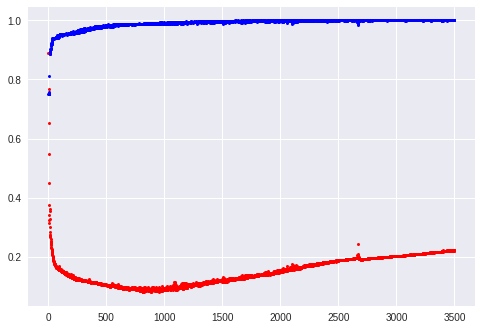

In [0]:
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()